<a href="https://colab.research.google.com/github/MauroTalamantes/Imagen-Restauracion-Ruido-Segmentacion-y-Contornos/blob/main/Restauracon%2C_ruido%2C_segmentacion_y_contornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importamos las imagenes desde el github
!git clone https://github.com/MauroTalamantes/Imagen-Restauracion-Ruido-Segmentacion-y-Contornos
%cd Imagen-Restauracion-Ruido-Segmentacion-y-Contornos

Cloning into 'Imagen-Restauracion-Ruido-Segmentacion-y-Contornos'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 5.84 MiB | 16.62 MiB/s, done.
/content/Imagen-Restauracion-Ruido-Segmentacion-y-Contornos


# 📗 Restauración de Imágenes
- Reparación de imágenes dañadas
- Eliminación de texto, logotipo u objeto de la imagen

La reconstrucción de las partes perdidas o deterioradas de las imágenes se conoce como **Repainting**. La reconstrucción se realiza de forma totalmente automática, aprovechando la información de las zonas no dañadas de la imagen.

En scikit-image, podemos aplicar el repainting con la función biarmónica de repainting, del módulo de restauración. Esta función requiere que se rellene la ubicación de los píxeles dañados, creando una imagen de máscara sobre la imagen. Una imagen de máscara es simplemente una imagen donde algunos valores de intensidad de píxeles son cero y otros no.

Para eliminar un objeto, podemos delinearlo manualmente en la **Máscara**. O bien, si queremos detectarlo automáticamente, necesitamos usar umbralización o segmentación. Esto significa que establecemos **máscaras** para las zonas dañadas de la imagen.

### Reconstrucción de imágenes en scikit-image

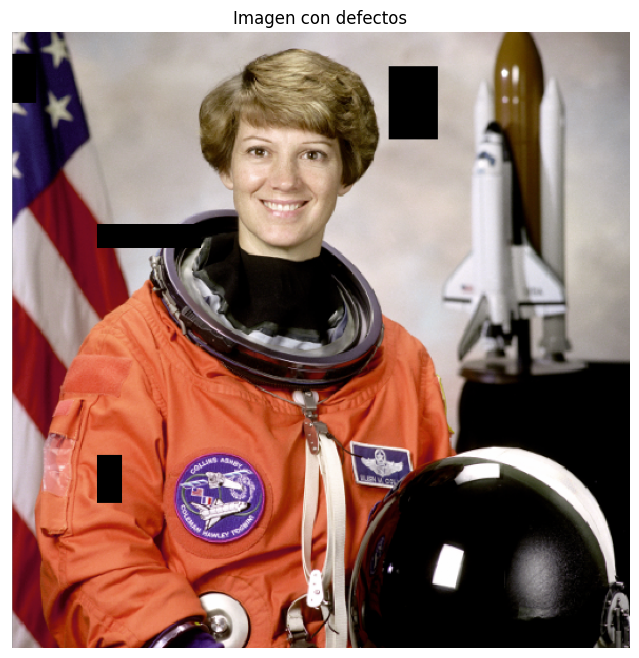

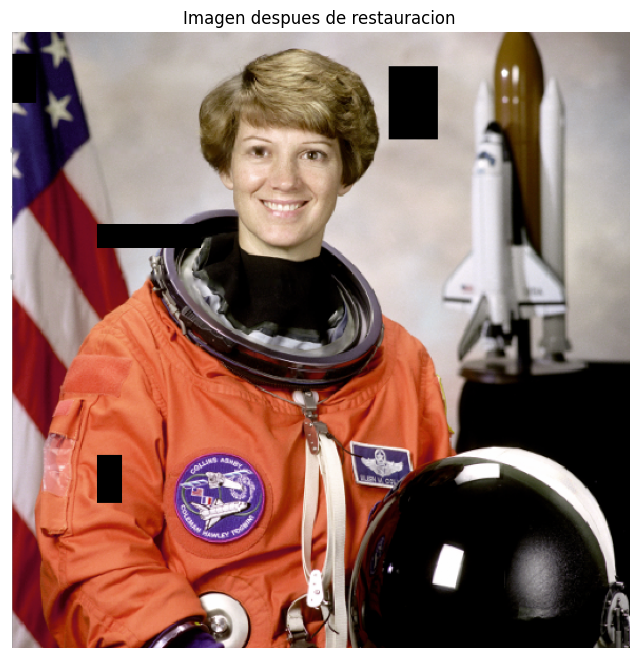

In [18]:
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_mask(image):
    # Creates mask with three defect regions
    mask = np.zeros(image.shape[:-1])

    mask[101:106, 0:240] = 1

    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1

    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

plt.rcParams['figure.figsize'] = (10, 8)

# Fuction for show a image
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

defect_image = plt.imread('dataset/defect_image.png')
# Obtain the mask
mask = get_mask(defect_image)

# Apply inpainting to the damaged image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask,channel_axis=-1)

# Show the resultant image
show_image(defect_image, 'Imagen con defectos')
show_image(restored_image, 'Imagen despues de restauracion')

### 📝 Restauramos una imagen dañada
En este ejercicio, restauraremos una imagen con partes faltantes usando la función <code>inpaint_biharmonic()</code>.

Trabajaremos con una imagen dañada. Algunos píxeles se han reemplazado por unos usando una máscara binaria, a propósito, para simular una imagen dañada. Reemplazar los píxeles por unos los vuelve completamente negros.

La máscara es una imagen en blanco y negro con parches que muestran la posición de los bits de la imagen dañados. Podemos aplicar la función de restauración en estas áreas.

Recuerda que la restauración es el proceso de reconstruir partes perdidas o deterioradas de imágenes y videos.

In [19]:
# Declare a get_mask() function for mask
def get_mask(image):
    # Creates mask with three defect regions
    mask = np.zeros(image.shape[:-1])

    mask[101:106, 0:240] = 1

    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1

    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

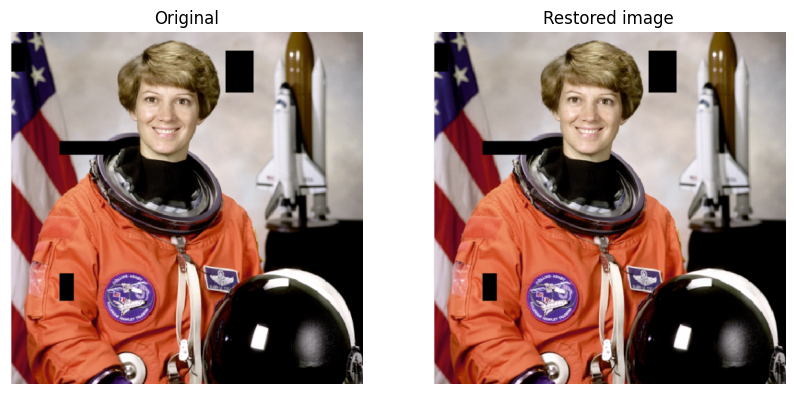

In [23]:
# Importacion de modulos para restauracion
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

# Leemos la imagen
defect_image = plt.imread('dataset/defect_image.png')
defect_image = resize(defect_image, (512, 512))
defect_image = color.rgba2rgb(defect_image)

# Obtenemos la mascara
mask = get_mask(defect_image)

# Aplicamos la funcion de restauracion a la imagen usando la mascara
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, channel_axis=-1)

# Mostramos la compración
plot_comparison(defect_image, restored_image, 'Imagen restaurada')

# 📗 Ruido
Las imágenes son señales, y las señales del mundo real suelen contener desviaciones de la señal ideal, que es la imagen perfecta, tal como la observamos en la vida real. Estas desviaciones se denominan ruido. Al ampliar la imagen, podemos observar cómo presenta granos de color.

Más específicamente, el ruido es el resultado de errores en el proceso de adquisición de la imagen que resultan en valores de píxeles que no reflejan la intensidad real de la escena. En esta imagen, podemos observar una variación de brillo y color que no se corresponde con la realidad, producida por la cámara.

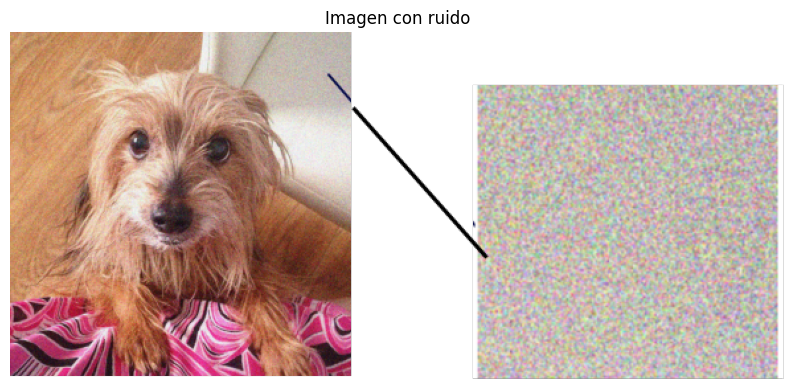

In [24]:
noise_image = plt.imread('dataset/noise_image.png')
show_image(noise_image, 'Imagen con ruido')

### 📌 Aplicar ruido en scikit-image
Usando la función random_noise, obtenemos la imagen original con mucho ruido añadido, distribuido aleatoriamente. Este tipo de ruido se conoce como "sal y pimienta" porque así es como se ve.

```python
# Importar el modulo y funcion
from skimage.util import random_noise

# Agregar ruido a la imagen
noisy_image = random_noise(dog_image)

# Mostrar imagen original y con ruido
show_image(dog_image)
show_image(noisy_image, 'Imagen con ruido')
```

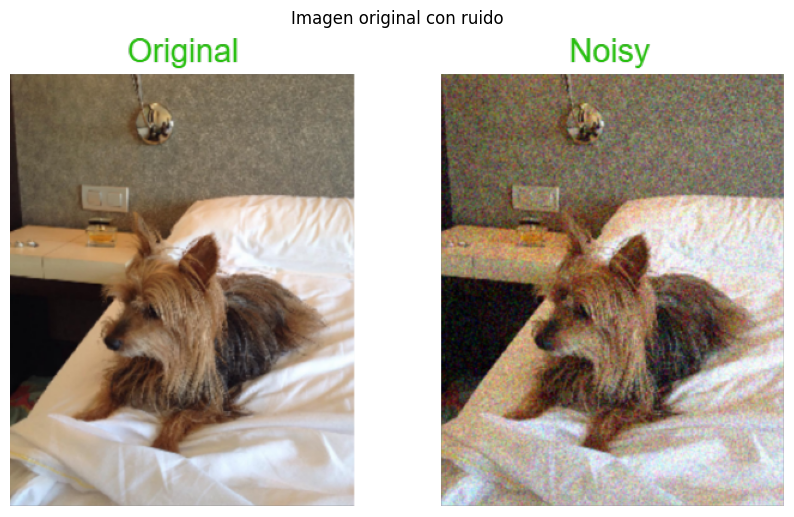

In [27]:
original_noisy = plt.imread('dataset/original_noisy.png')
show_image(original_noisy, 'Imagen original con ruido')

### 📌 Reducción de ruido
La mayoría de las veces, eliminamos o reducimos el ruido de las imágenes en lugar de añadirlo. Reducir el ruido de una imagen lleva tiempo, dependiendo de su resolución. Algunos tipos de algoritmos de eliminación de ruido son:
- Filtro de variación total (TV)
- Filtro bilateral
- Eliminación de ruido wavelet
- Eliminación de ruido no local

#### Eliminación de ruido mediante el filtro de variación total
```python
from skimage.restoration import denoise_tv_chambolle

# Aplicar filtro de variación total para la eliminación de rudio
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)

# Mostrar imagen eliminada de ruido
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')
```

#### Eliminació de ruido con filtro bilateral
```python
from skimage.restoration import denoise_bilateral

# Aplicar filtro bilateral para la eliminacion de ruido
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

# Mostrar imagenes originales y resultantes
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')
```


### 📝 ¡A hacer ruido!
En este ejercicio, se añade ruido a una imagen de fruta.

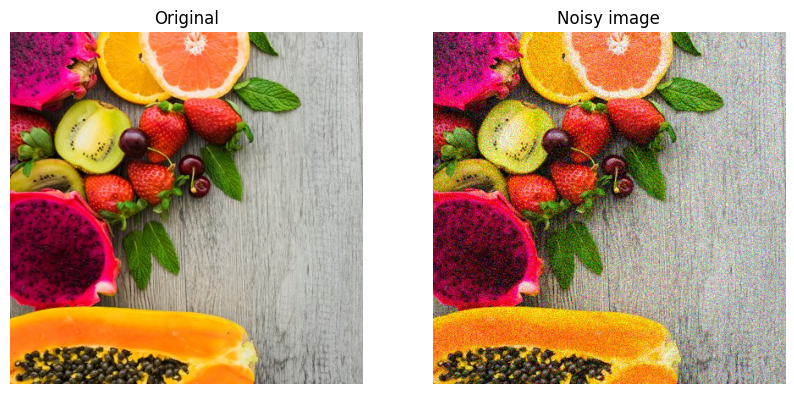

In [29]:
from skimage.util import random_noise

# Obtenemos la fruta de imagen
fruit_image = plt.imread('dataset/fruit_image.jpg')

#  Agregamos ruido a la imagen
noisy_image = random_noise(fruit_image)

# Mostramos la original y el resultante
plot_comparison(fruit_image, noisy_image, 'Noisy image')


### 📝 Reducción de ruido
Tenemos una imagen con ruido que queremos mejorar eliminándolo. Para ello, utilizamos el filtro de variación total (VDT).

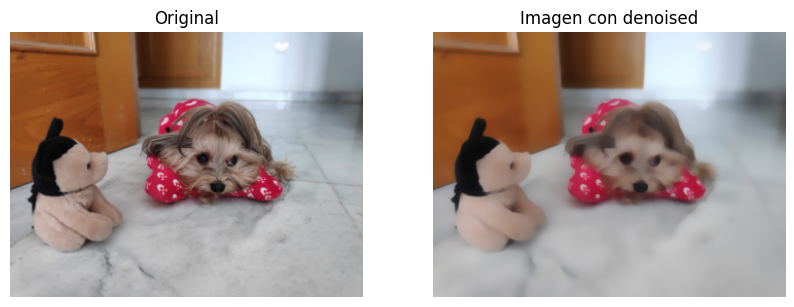

In [32]:
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread('dataset/cute_noisy_image.PNG')

# Aplicar vdt
denoised_image = denoise_tv_chambolle(noisy_image, channel_axis=-1)

# Mostrar original y con denoised
plot_comparison(noisy_image, denoised_image, 'Imagen con denoised')

### 📝 Reducción de ruido conservando los bordes
En este ejercicio, reducirás el ruido en esta imagen de paisaje. Como preferimos conservar los bordes de la imagen, usaremos el filtro de reducción de ruido bilateral.

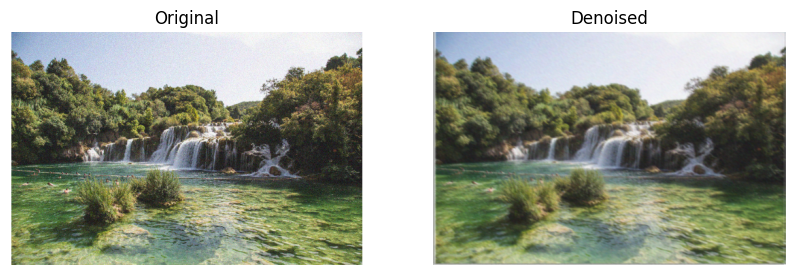

In [37]:
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread('dataset/landscape_image.PNG')

# Aplicar eliminación de ruido de filtro bilateral
denoised_image = denoise_bilateral(landscape_image, channel_axis=-1)

# Resultados
plot_comparison(landscape_image, denoised_image, 'Denoised')

# 📗 Superpíxeles y Segmentación

La segmentación divide las imágenes en regiones o segmentos para simplificar o transformar la representación en algo más significativo y fácil de analizar. Anteriormente, aprendimos sobre la Umbralización, que es el método más simple de segmentación: separa el primer plano del fondo. Pero la segmentación va más allá.

**Píxeles:** La imagen se representa como una cuadrícula de píxeles. Sin embargo, un solo píxel no representa nada significativo. Por lo tanto, podemos explorar significados más lógicos en una imagen formada por regiones más grandes o píxeles agrupados. Estos se conocen como **superpíxeles**.

## Superpíxeles
Un superpíxel es un grupo de píxeles conectados con colores o niveles de gris similares. Estos tienen más significado que sus contrapartes de cuadrícula de píxeles simple.

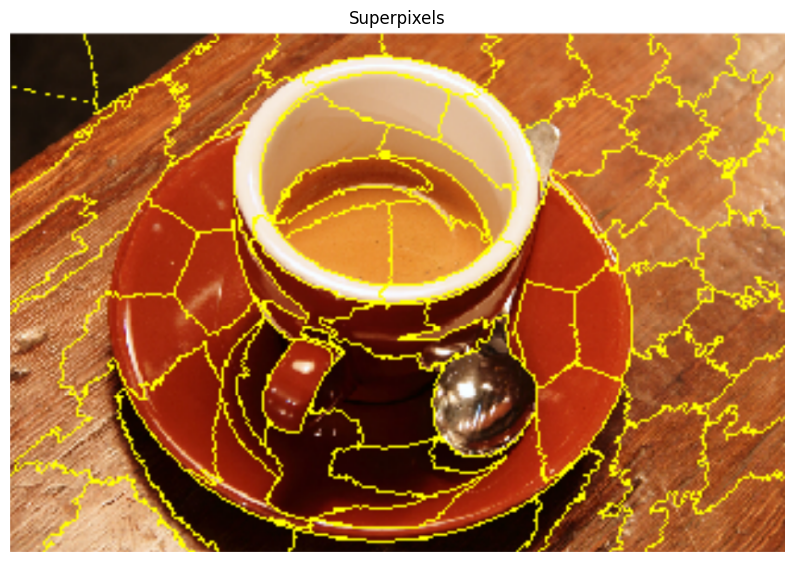

In [39]:
superpixels = plt.imread('dataset/superpixels.PNG')
show_image(superpixels, 'Superpixels')

La segmentación de superpíxeles consiste en dividir una imagen en superpíxeles. Se ha aplicado a numerosas tareas de visión artificial, como el seguimiento visual y la clasificación de imágenes. Algunas ventajas de su uso son que permite calcular características en regiones más significativas y reducir una imagen de miles de píxeles a ciertas regiones para algoritmos posteriores, lo que se traduce en mayor eficiencia computacional.

## Tipos de segmentación
Existen dos tipos de segmentación:
- No supervisada (no se requieren conocimientos previos)
- Supervisada (se utilizan ciertos conocimientos previos para guiar el algoritmo)

### 📌 Segmentación no supervisada
Segmentación no supervisada, donde no se requieren conocimientos previos. Estos algoritmos intentan subdividir las imágenes en regiones significativas automáticamente. El usuario puede ajustar ciertas configuraciones para obtener el resultado deseado.

#### Agrupamiento Iterativo Lineal Simple (o SLIC)
Segmenta la imagen mediante un algoritmo de aprendizaje automático llamado agrupamiento K-Medias. Toma todos los valores de píxeles de la imagen e intenta separarlos en un número predefinido de subregiones.
```python
# Importar los módulos
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtener los segmentos
segments = segmentation.slic(image)

# Colocar los segmentos sobre la imagen original para comparar
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmented_image,"Imagen segmentada")
```
### 📝 Segmentación de superpíxeles
En este ejercicio, aplicaremos segmentación no supervisada a la misma imagen antes de pasarla a un modelo de aprendizaje automático de detección facial.

De esta forma, reducirás esta imagen de 265×191 = 50.615 píxeles a 400 regiones.

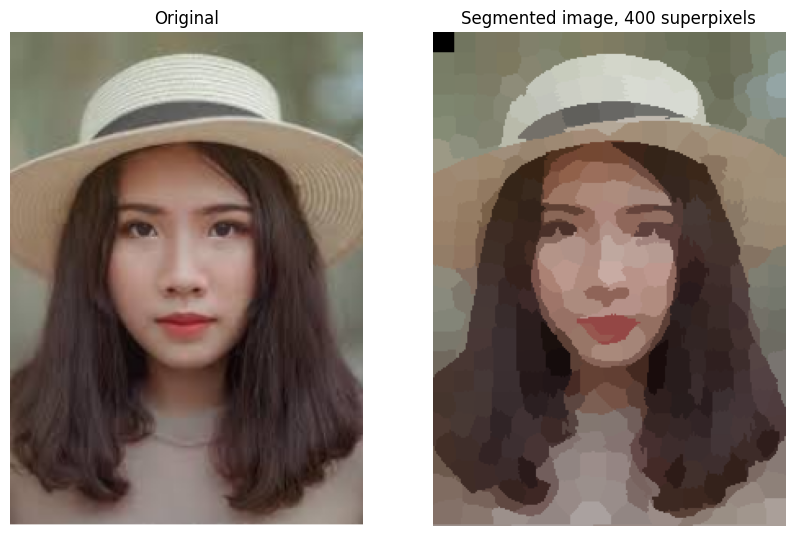

In [44]:
# Import the slic and label2rgb function from segmentation module
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread('dataset/face_image.PNG')
face_image = color.rgba2rgb(face_image)

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400, start_label=0)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

# 📗 Búsqueda de contornos
Un **contorno** es una forma cerrada de puntos o segmentos de línea que representa los límites de estos objetos. Encontrar contornos significa:
- Medir el tamaño
- Clasificar las formas
- Determinar el número de objetos

La entrada para una función de búsqueda de contornos debe ser una imagen binaria, que podemos generar aplicando primero un umbral. En dicha imagen binaria, los objetos que deseamos detectar deben ser blancos, mientras que el fondo permanece negro.

### 📌 Encontrar contornos con scikit-image

**PREPARACIÓN DE LA IMAGEN**

* Transformar la imagen a escala de grises 2D. ```python
# Convertir la imagen en escala de grises
image = color.rgb2gray(image)
```
* Binarizar la imagen

```python
# Obtener el valor umbral
thresh = threshold_otsu(image)
# Aplicar el umbral
thresholded_image = image > thresh
```

**Y LUEGO USAR <code>find_contours()</code>**

```python
# Importar el módulo de medida
from skimage import measure

# Encontrar contornos con un valor constante de 0.8
contours = measure.find_contours(thresholded_image, 0.8)
```
<br/>

### 📝 Contorneando formas
En este ejercicio, encontraremos el contorno de un caballo.

Para ello, usaremos una imagen binarizada proporcionada por scikit-image en su módulo de datos. Las imágenes binarizadas son más fáciles de procesar al buscar contornos con este algoritmo. Recuerde que la búsqueda de contornos solo admite matrices de imágenes 2D.

Una vez detectado el contorno, lo mostraremos junto con la imagen original. Así podremos comprobar si nuestro análisis fue correcto.

In [46]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contornos')
    plt.axis('off')

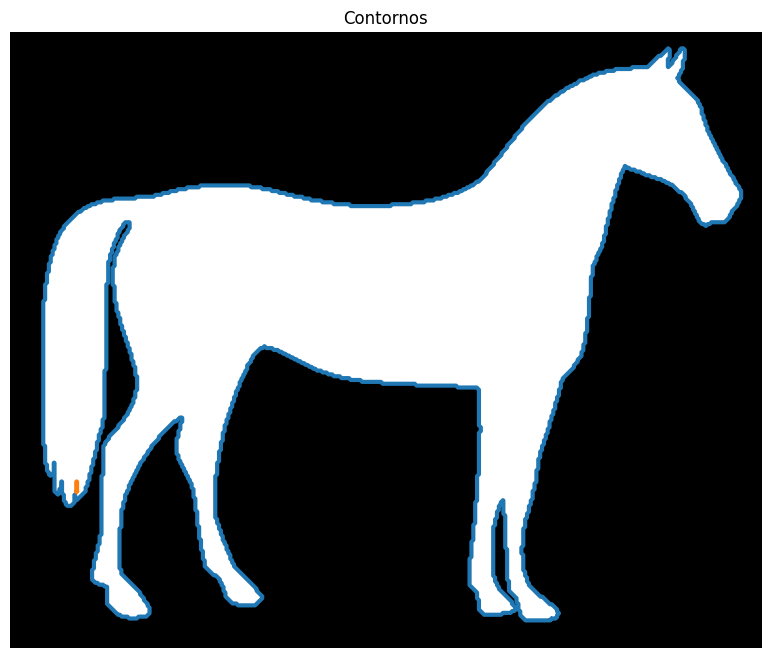

In [47]:
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

### 📝 Encuentra los contornos de una imagen no binaria
Profundicemos en cómo preparar una imagen para encontrar sus contornos y extraer información.

Procesaremos la imagen de dos dados morados cargados como image_dices y determinaremos el número que salió en cada dado.

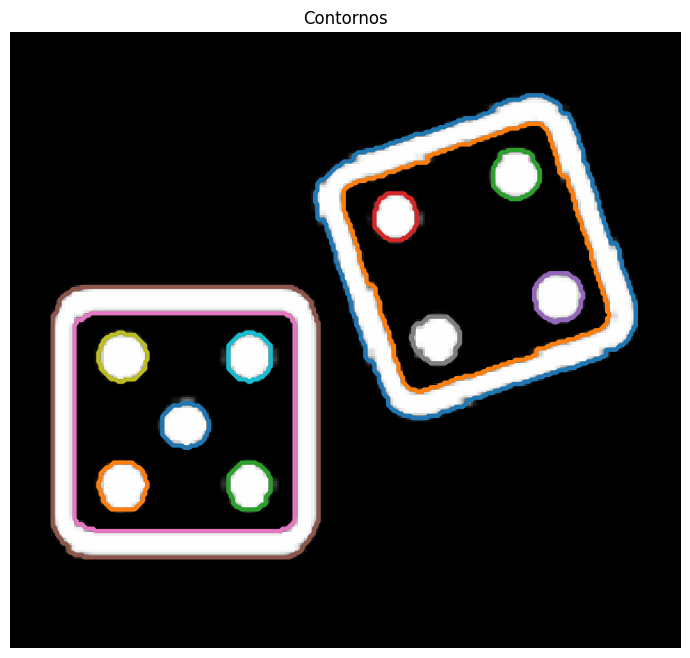

In [51]:
from skimage.filters import threshold_otsu

image_dices = plt.imread('dataset/dice.PNG')

# Hacemos laimagen a grises
image_dices = color.rgb2gray(color.rgba2rgb(image_dices))

# Obtenemos el umbral optimo
thresh = threshold_otsu(image_dices)

# Umbralizamos
binary = image_dices > thresh

# Encontramos contornos con un valor constante de 0.8
contours = measure.find_contours(binary, level=0.8)

# Mostramos la imagen
show_image_contour(image_dices, contours)

### 📝 Contar los puntos en la imagen de un dado
Ahora que hemos encontrado los contornos, podemos extraer información de ellos.

En el ejercicio anterior, preparamos la imagen de un dado morado para encontrar sus contornos:

Esta vez, determinaremos el número del dado contando los puntos en la imagen.

Crea una lista con todas las formas de los contornos llamada shape_contours. Puedes ver todas las formas de los contornos llamando a shape_contours en la consola una vez creada.

Comprueba que la mayoría de los contornos no superen los 50 puntos. Si los cuentas, representarán el número exacto de puntos en la imagen.

Número de puntos en los dados: 9.


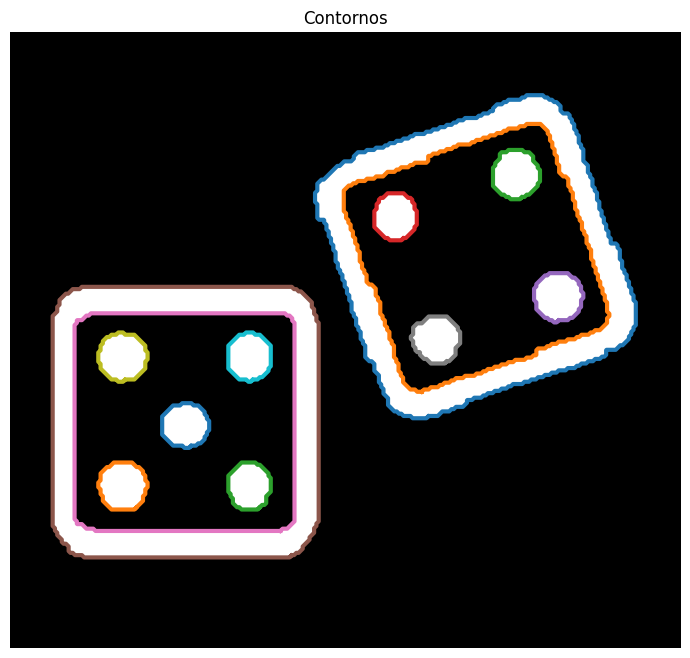

In [53]:
shape_contours = [cnt.shape[0] for cnt in contours]

# Establecemos 90 como el tamaño maximo de la forma de los puntos
max_dots_shape = 90

# Contamos los puntos en los contornos, exlcuendo los que sean mayores al tamaño de los puntos
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Mostramos todos los contornos encontrados
show_image_contour(binary, contours)

# Imprimimos el número del dado
print('Número de puntos en los dados: {}.'.format(len(dots_contours)))